In [26]:
#ニューラルネットワークモデル(基礎編)
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [10]:
a=np.array([0,1])
b=np.array([2,3])
np.dot(a,b)  #内積計算

np.int64(3)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


In [12]:
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.3)

In [15]:
#説明変数3つでニューラルネットワークモデルを作成する
X_train3 = X_train[:, :3]
X_test3 = X_test[:, :3]
print(X_train3.shape)
print(X_test3.shape)

(398, 3)
(171, 3)


In [20]:
model = Sequential()
model.add(Dense(2,input_shape=(3,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
result = model.fit(
    X_train3,
    y_train, 
    epochs=300, 
    batch_size=32)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3769 - loss: 15.7721 
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 14.8630 
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 14.0032 
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 13.1153 
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 12.2739 
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 11.4393 
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 10.6205
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 9.8025 
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3794 - loss: 9.0006 
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3794 - loss: 8.2296 
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3819 - loss: 7.4531 
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

Text(0.5, 1.0, '正解率の推移')

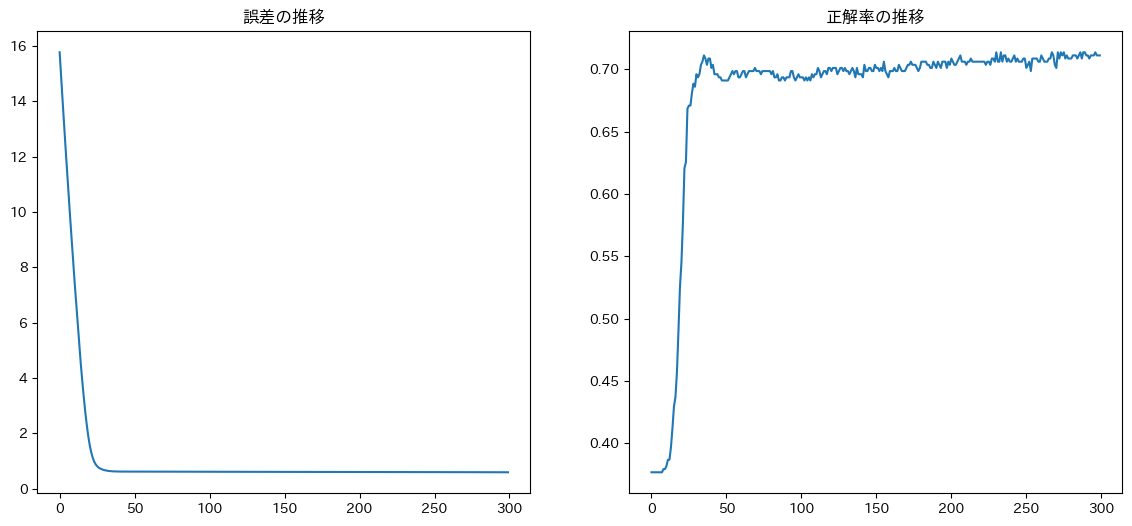

In [37]:
# figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(14,6))

# add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(result.history['loss'])
ax1.set_title('誤差の推移')
ax2.plot(result.history['accuracy'])
ax2.set_title('正解率の推移')

In [41]:
#学習モデルを改良したモデルを作成する
model2 = Sequential()